## Titanic Dataset Plots

This exercise consists of visiting: https://www.kaggle.com/c/titanic/data?select=test.csv and with such dataset, do 4 plots:

- Bar Plot

- Scatter Plot

- Pie Chart

- Stack Plot

### Headers

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import csv
f=open("titanic-db.csv")
data=list(csv.reader(f))
headers = data[0]
print(headers)
data=data[1:]

# todo: bar scatter pie stacked

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


### Organizing The Data

In [2]:
db = []
for item in data:
    # item is the row
    d = {h:val for h, val in zip(headers, item)}
    db.append(d)
db

[{'PassengerId': '1',
  'Survived': '0',
  'Pclass': '3',
  'Name': 'Braund, Mr. Owen Harris',
  'Sex': 'male',
  'Age': '22',
  'SibSp': '1',
  'Parch': '0',
  'Ticket': 'A/5 21171',
  'Fare': '7.25',
  'Cabin': '',
  'Embarked': 'S'},
 {'PassengerId': '2',
  'Survived': '1',
  'Pclass': '1',
  'Name': 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
  'Sex': 'female',
  'Age': '38',
  'SibSp': '1',
  'Parch': '0',
  'Ticket': 'PC 17599',
  'Fare': '71.2833',
  'Cabin': 'C85',
  'Embarked': 'C'},
 {'PassengerId': '3',
  'Survived': '1',
  'Pclass': '3',
  'Name': 'Heikkinen, Miss. Laina',
  'Sex': 'female',
  'Age': '26',
  'SibSp': '0',
  'Parch': '0',
  'Ticket': 'STON/O2. 3101282',
  'Fare': '7.925',
  'Cabin': '',
  'Embarked': 'S'},
 {'PassengerId': '4',
  'Survived': '1',
  'Pclass': '1',
  'Name': 'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
  'Sex': 'female',
  'Age': '35',
  'SibSp': '1',
  'Parch': '0',
  'Ticket': '113803',
  'Fare': '53.1',
  'Cabin': 'C123',
  'E

### 1. Scatter Plot

This plot shows the number of deaths and survivals per gender through the radius of the scatter plot point, and its height in the y axis is given by the average age of that group.

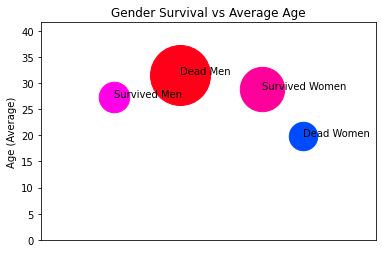

In [46]:
s_men = 0
s_men_age = 0
s_women = 0
s_women_age = 0
d_men = 0
d_men_age = 0
d_women = 0
d_women_age = 0

for d in db:
    if int(d['Survived']) == 1 and d['Sex'] == 'male':
        
        if d['Age']!= '':
            s_men += 1
            s_men_age += float(d['Age'])
    if int(d['Survived']) == 0 and d['Sex'] == 'male':
        
        if d['Age']!= '':
            d_men += 1
            d_men_age += float(d['Age'])
    if int(d['Survived']) == 1 and d['Sex'] == 'female':
        
        if d['Age']!= '':
            s_women += 1
            s_women_age += float(d['Age'])
    if int(d['Survived']) == 0 and d['Sex'] == 'female':
        d_women += 1
        if d['Age']!= '':
            
            d_women_age += float(d['Age'])
        
s_men_age = s_men_age / s_men
d_men_age = d_men_age / d_men
s_women_age = s_women_age / s_women
d_women_age = d_women_age / d_women

labels = ['Survived Men', 'Dead Men', 'Survived Women', 'Dead Women']
ys = [s_men_age, d_men_age, s_women_age, d_women_age]
radius = [s_men, d_men, s_women, d_women]
radius = [10 * r for r in radius]
xs = []
x = 0
xs.append(x)

for i in range(1,len(radius)):
    x += (radius[i-1] + radius[i])*0.2
    xs.append(x)
    
gap = 1000
#fig = plt.figure( figsize=(8,5) )
ax = plt.axes(xlim=(min(xs)-gap, max(xs)+gap), ylim=(0, max(ys)+10))
ax.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
from matplotlib import cm # color map
cmap = cm.get_cmap("hsv")
color_n = np.array(ys) / max(ys)
color_n = [cmap(c) for c in color_n]

for r in range(len(radius)):
    ax.scatter(xs[r], ys[r], s=radius[r], label=labels[r], color=color_n[r])
    ax.annotate(labels[r], (xs[r], ys[r]))
    
#ax.legend(loc="lower left", markerscale=0.2,scatterpoints=1, fontsize=10)
ax.set_title("Gender Survival vs Average Age")
plt.ylabel("Age (Average)")
plt.show()

### 2. Bar Plot

This chart shows the amount of deaths and survivals, each separated into 1st, 2nd and 3rd class of passenger. The height of the plot is given by the number of such cases.

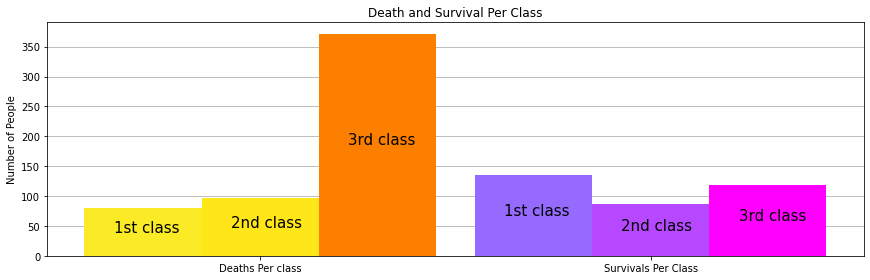

In [47]:
# 0 for dead 1 for survival
# 0 1 2 for classes 1st 2nd 3rd


from matplotlib import cm # color map
cmap0 = cm.get_cmap("Wistia")
cmap1 = cm.get_cmap("cool")
class_data = [[0, 0, 0], [0, 0, 0]]

for d in db:
    class_data[int(d['Survived'])][int(d['Pclass']) - 1] += 1

width = 0.3
xs = list(np.arange(0, len(class_data)))
offset = [-1, 0, 1]

colors = [[cmap0(c) for c in np.array(class_data[0]) / max(class_data[0])], 
          [cmap1(c) for c in np.array(class_data[0]) / max(class_data[1])]]
labels = ['1st class', '2nd class', '3rd class']

fig2 = plt.figure(figsize=(12, 4))
ax2 = fig2.add_subplot(1,1,1)

for s in range(len(class_data)):
    for c in range(len(class_data[s])):
        ax2.bar(np.array(xs[s]) + (width)*(offset[c]), class_data[s][c], width=width, color=colors[s][c], zorder=3)
        ax2.annotate(labels[c], (np.array(xs[s]) + (width)*(offset[c]) - (width/4.0), 
                                 class_data[s][c] - class_data[s][c] * 0.5), fontsize=15)
ax2.set_xticks(xs)
ax2.set_xticklabels(['Deaths Per class', 'Survivals Per Class'])
ax2.grid(zorder=0, axis='y')
ax2.set_title("Death and Survival Per Class")
fig2.tight_layout()
plt.ylabel("Number of People")
plt.show()

### 3. Pie Chart

This chart shows the contribution of each port of embarking to the totality of the passengers in the ship. There are three ports: Cherbourg, Queenstown and Southampton, each of which sent a certain amount of passengers to the Titanic. In the inner ring of the pie, the amount of deaths and survivals coming from each port is plotted with a label of S (Survival) or D (Death).

{'C': 93, 'Q': 30, 'S': 217} {'C': 75, 'Q': 47, 'S': 427} [93, 75, 30, 47, 217, 427]


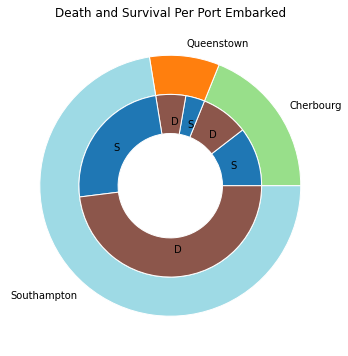

In [50]:
ports = ['Cherbourg', 'Queenstown', 'Southampton']
p = ['C', 'Q', 'S']
cmap3 = cm.get_cmap('tab20')
size = 0.3

people = {port: 0 for port in p}
deaths = {port: 0 for port in p}
alive = {port: 0 for port in p}
for d in db:
    if d['Embarked'] in p:
        people[d['Embarked']] += 1
        if d['Survived'] == '0':
            deaths[d['Embarked']] += 1
pie2_data = []
for p in deaths.keys():
    alive[p] = people[p] - deaths[p]
    pie2_data.append(alive[p])
    pie2_data.append(deaths[p])
print(alive, deaths, pie2_data)


nums = list(people.values())
color_data = np.array(nums) / max(nums)
colors_out = [cmap3(c) for c in color_data]
colors_in = [cmap3((c % 2)/2.0) for c in range(len(pie2_data))] # 0 1 0 1 0 1

fig3 = plt.figure(figsize=(6, 6))
ax3 = fig3.add_subplot(1,1,1)
ax3.pie(nums, labels = ports, radius=1, colors=colors_out, wedgeprops=dict(width=size, edgecolor='w'))
ax3.set_title("Death and Survival Per Port Embarked")
ax3.pie(pie2_data, radius=1-(size), colors=colors_in, 
        wedgeprops=dict(width=size, edgecolor='w'), labels = list('SD' * 3), labeldistance=0.7)
# wedgeprops=dict(): creates a donut (a pie chart with a hole in the center)
plt.show()

### 4. Stack Plot

This plot takes as y values the fare ($) that each passenger of a certain class (1st, 2nd or 3rd) had to pay for their ticket. The x axis are simply the each one of the passengers of each class.

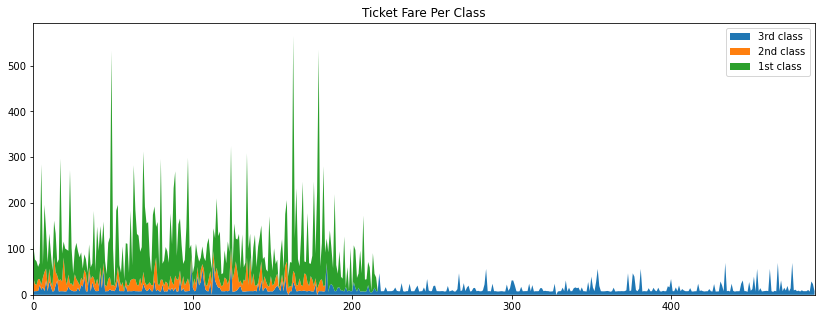

In [49]:
fares = [[], [], []] # 0 for 1st, 1 for 2nd, 3 for 3rd
labels = ['1st class', '2nd class', '3rd class']
for d in db:
    fares[int(d['Pclass'])-1].append(float(d['Fare']))
lengths = [len(fares[0]), len(fares[1]), len(fares[2])]

xs = np.arange(0, max(lengths))
y1 = np.zeros(max(lengths))
y2 = np.zeros(max(lengths))
y3 = np.zeros(max(lengths))

y1[:len(fares[0])] = fares[0]
y2[:len(fares[1])] = fares[1]
y3[:len(fares[2])] = fares[2]

fig4 = plt.figure(figsize=(14, 5))
ax4 = fig4.add_subplot(1,1,1)
ax4.stackplot(xs, y3, y2, y1, labels=labels[::-1])
ax4.set_title("Ticket Fare Per Class")
ax4.set_xlim(0, max(lengths)-1)
ax4.legend()
plt.show()